In [214]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [215]:
# Load the CSV file into a DataFrame
data = pd.read_csv('LCE.csv')
data = data.drop('Unnamed: 0', axis = 1)

# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

# Convert 'Male' to 1 and 'Female' to 0
data['GENDER'] = data['GENDER'].replace({'Male': 1, 'Female': 0})
print(data.head)

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64
<bound method NDFrame.head of       GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0          1   65        1               1        1              0   
1          0   55        1               0        0              1   
2          0   78        0               0        1              1   
3          1   60        0               1        1              1   
4          0   80        1               1        0              1   
...      ...  ...      ...             ...      ...            ...   
2995       0   71        0         

In [216]:
# X: Features, Y: Target ('LUNG_CANCER')

X = data.iloc[:, :15]  # Select all rows, first 15 columns
#X = data.drop('LUNG_CANCER', axis=1)
#Y = data['LUNG_CANCER']

# Select just the 15th column (index 14)
Y = data.iloc[:, 14]  # Use index 14 for the 15th column

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Print shapes of the resulting datasets to verify
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print(X.head)

(2400, 15) (600, 15) (2400,) (600,)
<bound method NDFrame.head of       GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0          1   65        1               1        1              0   
1          0   55        1               0        0              1   
2          0   78        0               0        1              1   
3          1   60        0               1        1              1   
4          0   80        1               1        0              1   
...      ...  ...      ...             ...      ...            ...   
2995       0   71        0               1        1              0   
2996       0   75        1               0        1              1   
2997       0   62        0               0        0              1   
2998       1   30        1               1        0              0   
2999       1   40        1               0        0              1   

      CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  \
0                   0

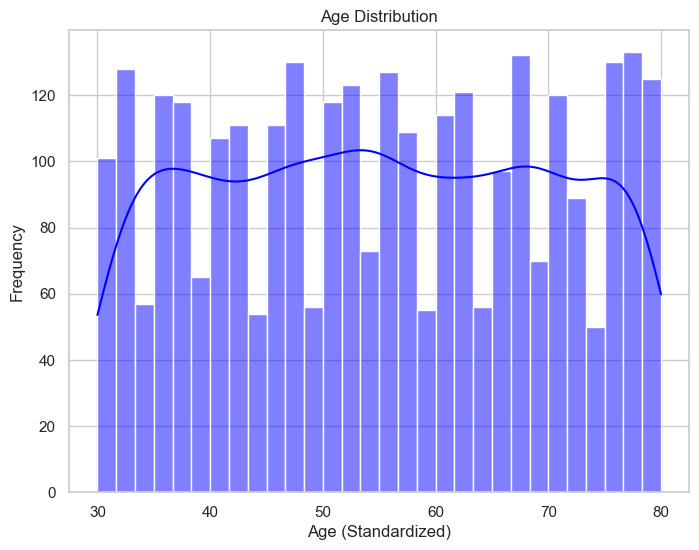

In [217]:
#Looking At Age Distribution



import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['AGE'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age (Standardized)')
plt.ylabel('Frequency')
plt.show()

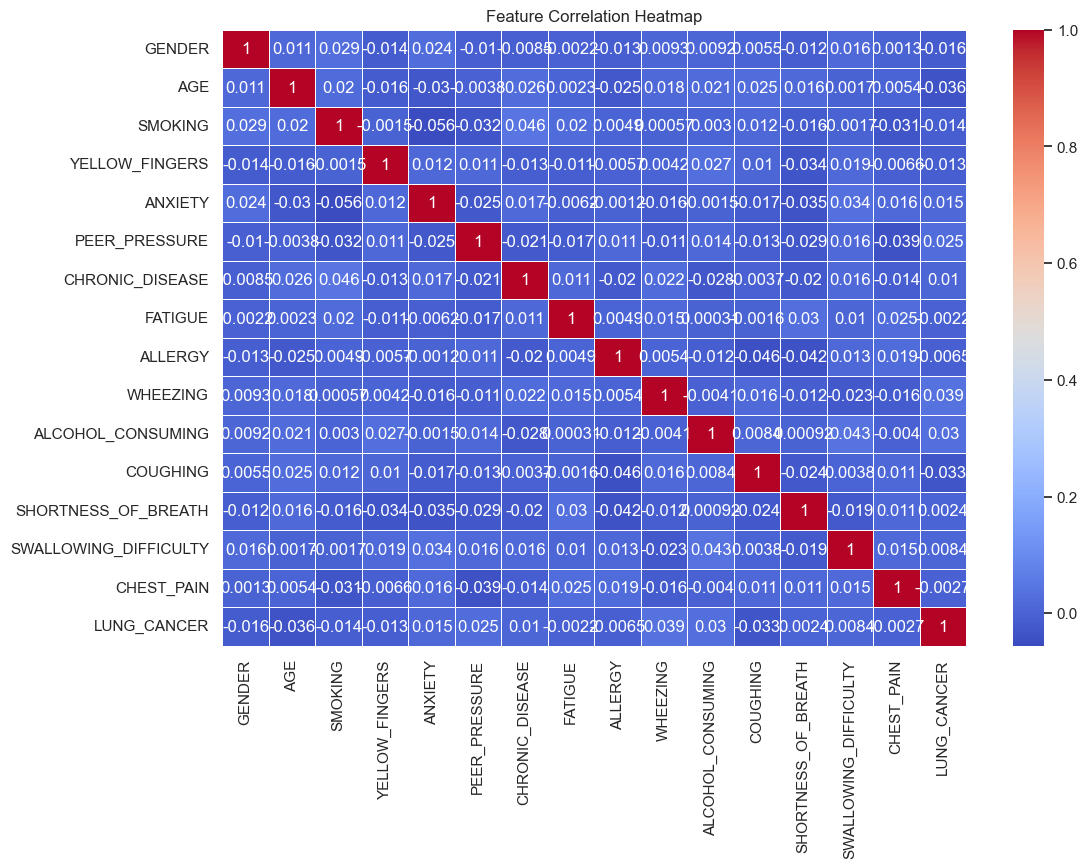

In [218]:
#Correlation Heatmap

plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


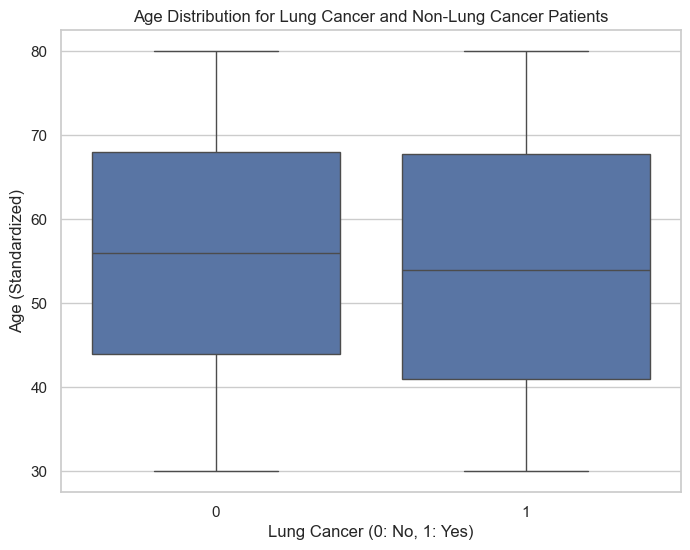

In [219]:
#Box Plot for Age vs. LUNG_CANCER

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['LUNG_CANCER'], y=data['AGE']  )
plt.title('Age Distribution for Lung Cancer and Non-Lung Cancer Patients')
plt.xlabel('Lung Cancer (0: No, 1: Yes)')
plt.ylabel('Age (Standardized)')
plt.show()

In [220]:
# Models

In [221]:
#Random Forest

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)
clf_pred = clf.predict(X_test)

accuracy = accuracy_score(Y_test, clf_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


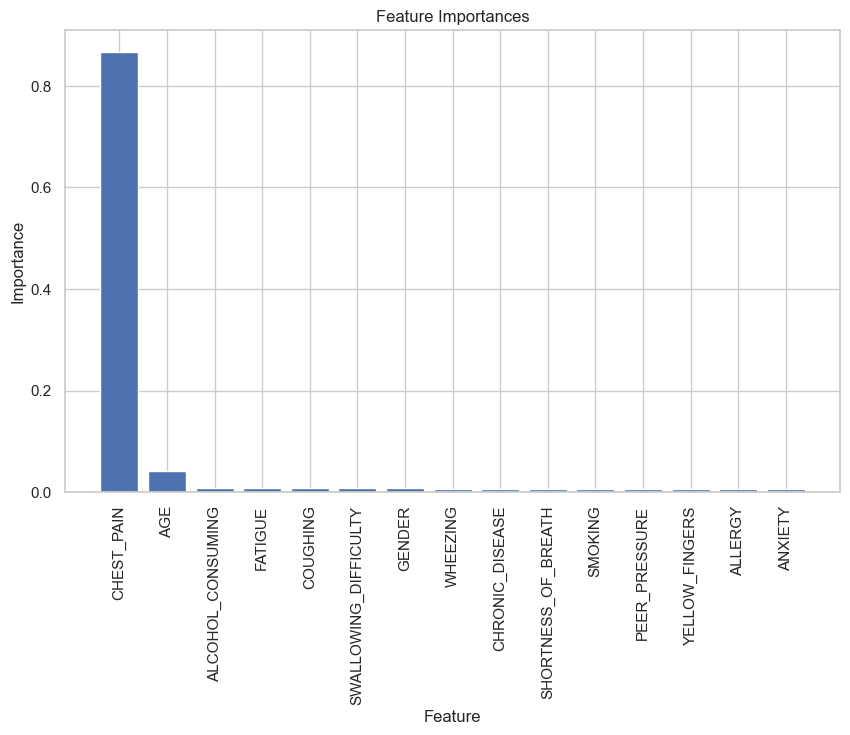

In [222]:
# Plot the feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort the features by importance

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(data.columns)[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [223]:
#SVM Model

modelSVC = SVC(probability = True)
modelSVC.fit(X_train, Y_train)
SVM_pred = modelSVC.predict(X_test)

accuracy = accuracy_score(Y_test, SVM_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [224]:
#Decision Tree model

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, dt_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [225]:
#Gradient Boosting

# Initialize Gradient Boosting model
GBmodel = GradientBoostingClassifier()
GBmodel.fit(X_train, Y_train)

# Make predictions on the test set
GB_pred = GBmodel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, GB_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [226]:
#KNN Model

knn = KNeighborsClassifier(n_neighbors=12)

# Train the model
knn.fit(X_train, Y_train)

# Make predictions on the test data
knn_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, knn_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 99.83%


In [227]:
#Logistic Regression

# Initialize and train the Logistic Regression model
LR_model = LogisticRegression(max_iter=200, random_state=42)
LR_model.fit(X_train, Y_train)

# Make predictions on the test data
LR_pred = LR_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, LR_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [228]:
#Regression Tree

# Initialize the DecisionTreeRegressor (Regression Tree)
RT_model = DecisionTreeRegressor(random_state=42)
RT_model.fit(X_train, Y_train)

# Make predictions on the test data
RT_pred = RT_model.predict(X_test)

accuracy = accuracy_score(Y_test, RT_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')



Accuracy: 100.00%


Correlation Matrix of Model Predictions:
                    DecisionTree       KNN  LogisticRegression  \
DecisionTree            1.000000  0.996653            1.000000   
KNN                     0.996653  1.000000            0.996653   
LogisticRegression      1.000000  0.996653            1.000000   
GradientBoosting        1.000000  0.996653            1.000000   
SVM                     1.000000  0.996653            1.000000   
RandomForest            1.000000  0.996653            1.000000   

                    GradientBoosting       SVM  RandomForest  
DecisionTree                1.000000  1.000000      1.000000  
KNN                         0.996653  0.996653      0.996653  
LogisticRegression          1.000000  1.000000      1.000000  
GradientBoosting            1.000000  1.000000      1.000000  
SVM                         1.000000  1.000000      1.000000  
RandomForest                1.000000  1.000000      1.000000  


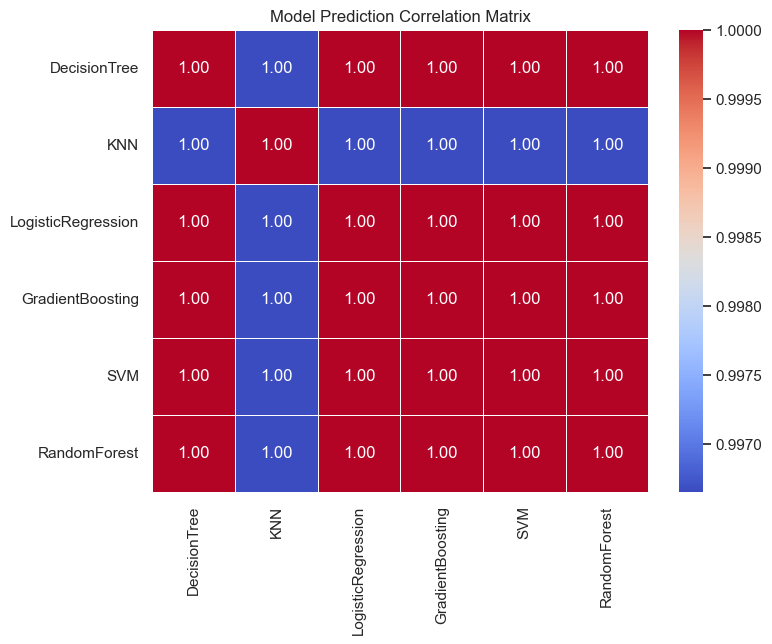

In [229]:
# Combine the predictions into a DataFrame for comparison
predictions_df = pd.DataFrame({
    'DecisionTree': dt_pred,
    'KNN': knn_pred,
    'LogisticRegression': LR_pred,
    'GradientBoosting': GB_pred,
    'SVM': SVM_pred,
    'RandomForest': clf_pred
})

# Compute the correlation matrix of the model predictions
pred_corr_matrix = predictions_df.corr()

# Display the correlation matrix
print("Correlation Matrix of Model Predictions:")
print(pred_corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pred_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Model Prediction Correlation Matrix')
plt.show()


In [230]:
#Recursive Feature Elimination

In [231]:
#RFE on Logistic Regression

# Create an RFE selector and fit to training data
rfe = RFE(estimator=LR_model, n_features_to_select=5)  # Keep 5 features
rfe.fit(X_train, Y_train)


# Get the list of selected features
selected_features = np.where(rfe.support_)[0]
print("Indices of selected features:", selected_features)



# Train the model using the selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Fit the model
LR_model.fit(X_train_selected, Y_train)

# Make predictions
LR_pred = LR_model.predict(X_test_selected)

# Evaluate performance (accuracy for classification or MSE for regression)
accuracy = accuracy_score(Y_test, LR_pred)  # Or use other metrics for regression
print("Model Accuracy with selected features:", accuracy)



Indices of selected features: [ 2  4  5  9 14]
Model Accuracy with selected features: 1.0


In [232]:
#RFE on Random Forest


# Create an RFE selector and fit to training data
rfe = RFE(estimator=clf, n_features_to_select=5)  # Keep 5 features
rfe.fit(X_train, Y_train)


# Get the list of selected features
selected_features = np.where(rfe.support_)[0]
print("Indices of selected features:", selected_features)



# Train the model using the selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Fit the model
clf.fit(X_train_selected, Y_train)

# Make predictions
clf_pred = clf.predict(X_test_selected)

# Evaluate performance (accuracy for classification or MSE for regression)
accuracy = accuracy_score(Y_test, clf_pred)  # Or use other metrics for regression
print("Model Accuracy with selected features:", accuracy)

Indices of selected features: [ 1  2  5 12 14]
Model Accuracy with selected features: 1.0


In [233]:
#RFE on Gradient Boosting


# Create an RFE selector and fit to training data
rfe = RFE(estimator=GBmodel, n_features_to_select=5)  # Keep 5 features
rfe.fit(X_train, Y_train)


# Get the list of selected features
selected_features = np.where(rfe.support_)[0]
print("Indices of selected features:", selected_features)



# Train the model using the selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Fit the model
GBmodel.fit(X_train_selected, Y_train)

# Make predictions
GB_pred = GBmodel.predict(X_test_selected)

# Evaluate performance (accuracy for classification or MSE for regression)
accuracy = accuracy_score(Y_test, GB_pred)  # Or use other metrics for regression
print("Model Accuracy with selected features:", accuracy)

Indices of selected features: [ 0  1  2 10 14]
Model Accuracy with selected features: 1.0


In [234]:
# Bagging

In [235]:
#Bagging on Decision Tree Model

# Initialize Bagging with the base model for classification
DT_bagging_model = BaggingClassifier(estimator=dt_model, n_estimators=50, random_state=42)

# Train the Bagging model
DT_bagging_model.fit(X_train, Y_train)

# Predict on the test set
DT_pred = DT_bagging_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, DT_pred)
print(f"Accuracy of Bagging Classifier: {accuracy:.2f}")


Accuracy of Bagging Classifier: 1.00


In [236]:
#Bagging on KNN

# Initialize Bagging with the base model for classification
KNN_bagging_model = BaggingClassifier(estimator=knn, n_estimators=50, random_state=42)

# Train the Bagging model
KNN_bagging_model.fit(X_train, Y_train)

# Predict on the test set
KNN_pred = KNN_bagging_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, KNN_pred)
print(f"Accuracy of Bagging Classifier: {accuracy:.2f}")

Accuracy of Bagging Classifier: 1.00


In [237]:
#Bagging on SVM


# Initialize Bagging with the base model for classification
SVM_bagging_model = BaggingClassifier(estimator=modelSVC, n_estimators=50, random_state=42)

# Train the Bagging model
SVM_bagging_model.fit(X_train, Y_train)

# Predict on the test set
SVM_pred = SVM_bagging_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, SVM_pred)
print(f"Accuracy of Bagging Classifier: {accuracy:.2f}")

Accuracy of Bagging Classifier: 1.00


In [238]:
#Voting Classifier

#Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('logreg', LR_model), ('svc', modelSVC), ('knn', knn), ('GradientBoost', GBmodel)],
    voting='hard'  # 'hard' for majority class voting, 'soft' for weighted probability voting
)
#Train the VotingClassifier on the training data
voting_clf.fit(X_train, Y_train)

#Make predictions
y_pred = voting_clf.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy of Voting Classifier: {accuracy:.4f}")


Accuracy of Voting Classifier: 1.0000
